# Classifying Fashion-MNIST
in this notebook I'll build a NN to classify the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST this is from [ntro to Deep Learning with PyTorch
by Facebook AI](https://classroom.udacity.com/courses/ud188/lessons/c5706f76-0e30-4b48-b74e-c19fafc33a75/concepts/c729c4db-6e81-4e0b-8c0a-13395659d405) assignments

![Fashion-MNIST](./img/fashion-mnist-sprite.png)

## First off, let's load the dataset through torchvision.

In [11]:
import torch
from torchvision import datasets, transforms
import helper #The helper.py you can find it in the course repository on github


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

torch.Size([64, 1, 28, 28])


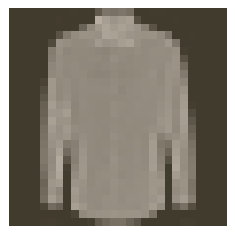

In [3]:
image, label = next(iter(trainloader))
print(image.shape)
helper.imshow(image[0,:]);

## Building the network

Here I define the network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes.

In [5]:
from torch import nn
import torch.nn.functional as F
from torch import optim

model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

# Train the network
Now you should create your network and train it. First you'll want to define the criterion The negative log likelihood loss and the optimizer is adam optimizer.

Then write the training code:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

In [7]:
#Creating the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [8]:
for epochs in range(5):
    running_loss = 0
    for image , label in trainloader:
        image = image.view(image.shape[0],-1)
        
        
        output = model(image)
        
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        
        
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 486.66824078559875
Training loss: 368.47730527818203
Training loss: 335.46243553981185
Training loss: 313.1044791415334
Training loss: 297.9464880079031


## Time to See What the model did

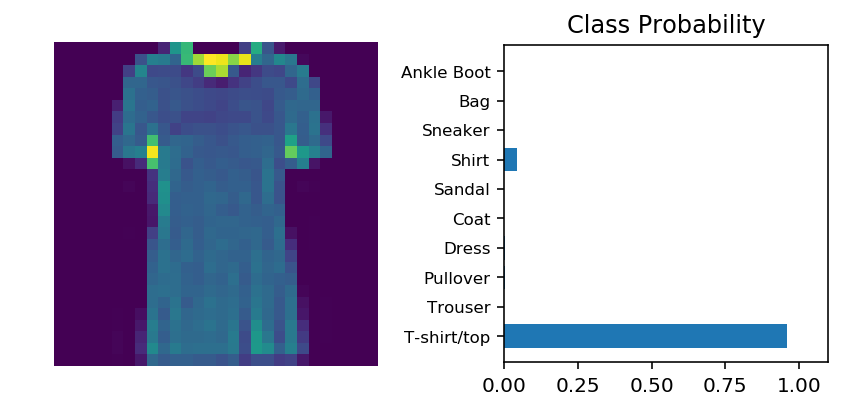

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out the network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
    
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

The helper.py you can find it in the course repository on github